<p style="float:right; margin-top:20px; padding: 20px 20px 0px 20px; background:rgba(255,255,255,0.6); border-radius:10px;">
<img width="600px" src=figures/logo2.png?raw=true>
</p>
<br>
<br>
<br>
<h1 style="color:#000000"> TomoPy Crash Course </h1>
<h3 style="color:#000000"> This notebook is a quick introduction to the Python class
provided with SeisTomoPy.</h3>



# Important starting notes

Clone the git repository and install in an editable fashion:

   $ git clone https://github.com/stephaniedurand/SeisTomoPy_Valpha.git
   
   $ cd SeisTomoPy_Valpha
   
   $ pip install -v -e .

Then you have to import some packages, including SeisTomoPy so that you will be able to use the various SeisTomoPy functions.

In [1]:
%pylab inline
import imp
import math
import numpy as np
import matplotlib.pyplot as plt
import SeisTomoPy

Populating the interactive namespace from numpy and matplotlib


# How to use SeisTomoPy class

## 1. Cross sections

The user to generate cross sections through $V_p$, $V_s$ or $\rho$ variations anywhere on Earth using SeisTomopy.cross_section_plot. This generates directly the plot of the cross section. However, the user could also be interested in getting the values of the cross section and then perform some further calculations. This can also be achieved running now SeisTomopy.cross_section. The latter function returns as outputs the matrix containing the cross section (Z) as well as the angle (th) and radius vectors (r) that the user would need if he desires to perform further calculations with this cross section.

Below is an example of how to get a cross section beneath Africa using both class. It is showing the African Large Low Shear Velocity Province. Pink circles show hotspot locations, white circles denote earthquake locations and green, red and yellow circles the starting, ending and mid-point, respectively, along the profile. 

/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: ax

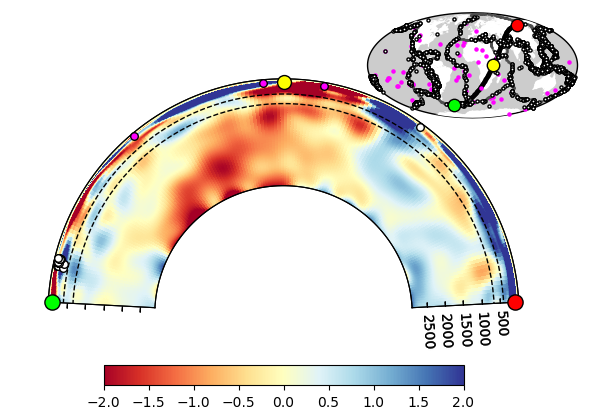

In [2]:
# Setting parameters
# Model to be plotted
model = 'SEMUCBWM1'  
# Parameter to be plotted
para = 'VS'    
# Latitutde of the starting point of the cross section
elat = -60    
# Longitude of the starting point of the cross section
elon = -49   
# Latitutde of the ending point of the cross section
slat = 60 
# Longitude of the ending point of the cross section
slon = 119  
# Depth of the cross section
depth = 2890      
# Spherical harmonic degrees to be used
NSmax = 40     
# Maximal velocity perturbations for the colorbar
Vmax = 2             

# Running cross_section_plot
SeisTomoPy.cross_section_plot(model,para,elat,elon,slat,slon,depth,NSmax,Vmax)

# Running cross_section
Z, th, r = SeisTomoPy.cross_section(model,para,elat,elon,slat,slon,depth,NSmax)

## 2. Maps

The user can create maps at a given depth for the whole globe using SeisTomopy.tomomap_plot. This generates directly the plot of the map. However, the user could also be interested in getting the values of the map and then perform some further calculations. 

Below is an example of how to obtain a map for the tomographic model SEISGLOB2 at 1,000 km depth using both class. Pink circles show hotspot locations and grey lines the plate boundaries. 

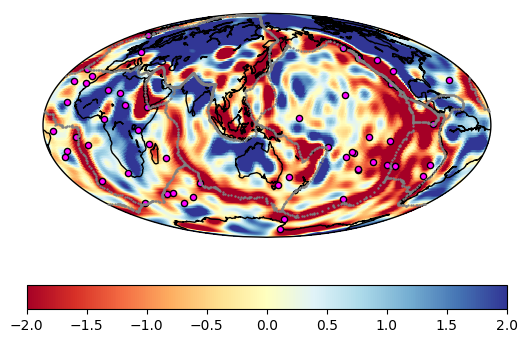

In [11]:
# Setting parameters
# Model to be plotted
model = 'SEMUCBWM1'   
# Parameter to be plotted
para = 'VS'  
# Depth of the map to be plotted
depth = 50   
# Spherical harmonic degrees to be used
NSmax = 30    
# Maximal velocity perturbations for the colorbar
Vmax = 2              

# Running tomomap_plot
SeisTomoPy.tomomap_plot(model,para,depth,NSmax,Vmax)

# Running tomomap
Z, lat, lon = SeisTomoPy.tomomap(model,para,depth,NSmax)

You can also change $NSmax$ to a value below 40, you will then obtain a filtered image of the model.

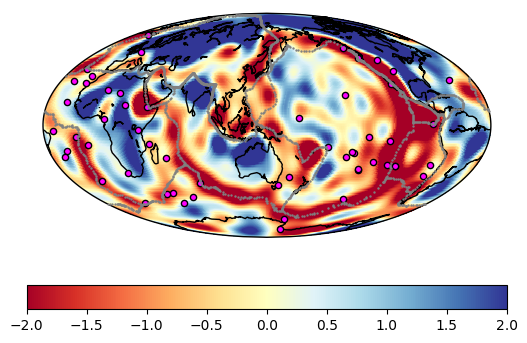

In [12]:
# Filtering the model
NSmax = 18

SeisTomoPy.tomomap_plot(model,para,depth,NSmax,Vmax)

It is important to note that these two first tools can only be used for using the default tomographic models already included in SeisTomoPy.

## 3. Spectrum

The user can compute the amplitude spectrum, $S(X,z,l)$,  for a given model at a given depth, $z$, for a given parameter, $X$, and for a certain spherical harmonic degree, $l$, using SeisTomoPy.spectrum and SeisTomoPy.spectrum_fromfile. The first one compute the spectrum for the models included by default in SeisTomoPy while the second one enables the user to compute the spectrum in any model he would like as long as he can  provide the required input file.

The spectrum is defined by:
\begin{equation}
	S\left(X,z,l\right)= \sqrt{\frac{1}{4\pi}\sum_{m=-l}^{l} \left(\frac{\delta X}{X}(z)\right)_{lm} \, \left(\frac{\delta X}{X}(z)\right)_{lm}^\star },
\end{equation}

where the exponent "$^{\star}$" denotes the complex conjugate and $\left(\frac{\delta X}{X}(z)\right)_{lm} $ the spherical harmonic coefficients of the considered parameter $X$ for a given tomographic model at depth $z$. $X$ stands for $V_s$, $V_p$ or density.

Below is an example of obtained spectrum for various models at 520 km depth, for parameter $V_s$ and up to spherical harmonic degree 40 and then how to get the spectrum for any model not included in SeisTomoPy.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 Example of spectrum computed in the default tomographc models 
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


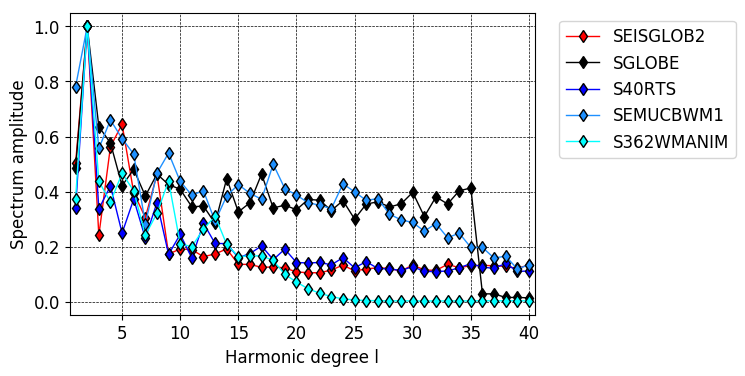

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
          Example of spectrum computed in another model        
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


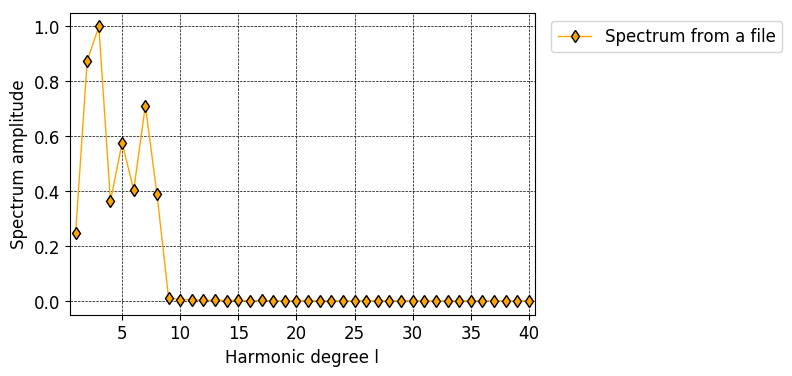

In [8]:
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print(' Example of spectrum computed in the default tomographic models ')
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

# Setting parameters
# Models to be used for computing the spectrum
model1 = 'SEISGLOB2'     
model2 = 'SGLOBE'
model3 = 'S40RTS'
model4 = 'SEMUCBWM1'
model5 = 'S362WMANIM'
# Depth at which the spectrum is computed
depth = 520    
# Parameter used for computing the spectrum
para = 'VS'     
# Maximum spherical harmonic degree up to which the spectrum is computed
NSmax = 40               

# Running spectrum
sp1 = SeisTomoPy.spectrum(model1,para,depth,NSmax)
sp2 = SeisTomoPy.spectrum(model2,para,depth,NSmax)
sp3 = SeisTomoPy.spectrum(model3,para,depth,NSmax)
sp4 = SeisTomoPy.spectrum(model4,para,depth,NSmax)
sp5 = SeisTomoPy.spectrum(model5,para,depth,NSmax)

# Plotting the results 
plt.plot(sp1[:,0], sp1[:,1]/np.amax(sp1[:,1]), linewidth=1.0,color="red",marker="d",markeredgecolor="k", label=model1)
plt.plot(sp2[:,0], sp2[:,1]/np.amax(sp2[:,1]), linewidth=1.0,color="k",marker="d",markeredgecolor="k", label=model2)
plt.plot(sp3[:,0], sp3[:,1]/np.amax(sp3[:,1]), linewidth=1.0,color="blue",marker="d",markeredgecolor="k", label=model3)
plt.plot(sp4[:,0], sp4[:,1]/np.amax(sp4[:,1]), linewidth=1.0,color="dodgerblue",marker="d",markeredgecolor="k", label=model4)
plt.plot(sp5[:,0], sp5[:,1]/np.amax(sp5[:,1]), linewidth=1.0,color="cyan",marker="d",markeredgecolor="k", label=model5)

plt.legend(bbox_to_anchor=(1.45, 1))
plt.xlabel("Harmonic degree l")
plt.ylabel("Spectrum amplitude")
plt.xlim([0.5, NSmax+0.5])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.show()

print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print('          Example of spectrum computed in another model        ')
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

# Running spectrum_fromfile
filename = 'SeisTomoPy_notebook/files/input_file_spectrum.xyz'
sp_fromfile = SeisTomoPy.spectrum_fromfile(filename,NSmax)

# Plotting the results 
plt.plot(sp_fromfile[:,0], sp_fromfile[:,1]/np.amax(sp_fromfile[:,1]), linewidth=1.0,color="orange",marker="d",markeredgecolor="k", label='Spectrum from a file')
plt.legend(bbox_to_anchor=(1.55, 1))
plt.xlabel("Harmonic degree l")
plt.ylabel("Spectrum amplitude")
plt.xlim([0.5, NSmax+0.5])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.show()

It is also possible to run the spectrum calculations routinely, at various depths for instance. Be careful the example below can take some time to run. You can reduce this time changing 

$ depths = np.arange(100,2900,100)

to 

$ depths = np.arange(100,1100,100)

for instance.

('depth ', 100)
('depth ', 200)
('depth ', 300)
('depth ', 400)
('depth ', 500)
('depth ', 600)
('depth ', 700)
('depth ', 800)
('depth ', 900)
('depth ', 1000)
('depth ', 1100)
('depth ', 1200)
('depth ', 1300)
('depth ', 1400)
('depth ', 1500)
('depth ', 1600)
('depth ', 1700)
('depth ', 1800)
('depth ', 1900)
('depth ', 2000)
('depth ', 2100)
('depth ', 2200)
('depth ', 2300)
('depth ', 2400)
('depth ', 2500)
('depth ', 2600)
('depth ', 2700)
('depth ', 2800)


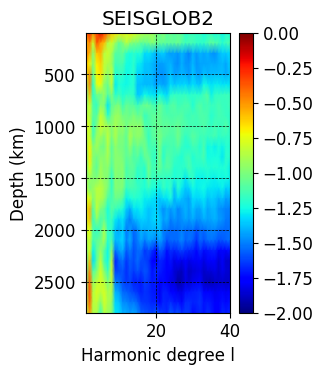

In [13]:
# Setting parameters
# Model to be used for computing the spectrum
model = 'SEISGLOB2'     
# Depth range at which the spectrum is computed
depths = np.arange(100,2900,100)
# Parameter used for computing the spectrum
para = 'VS'     
# Maximum spherical harmonic degree up to which the spectrum is computed
NSmax = 40

deg = np.arange(1,41,1)
sp1 = np.zeros([len(deg),len(depths)])

# Running spectrum routinely at various depths
for i in range(len(depths)):
    print('depth ',depths[i])
    sp11 = SeisTomoPy.spectrum(model,para,depths[i],NSmax)
    for k in range(len(deg)):
        sp1[k,i]=sp11[k,1]

# Plotting the result
X, Y = np.meshgrid(deg, depths)
plt.subplots_adjust(bottom=0.2, right=0.5, left=0.2, top=0.9)
plt.pcolormesh(X, Y, (np.log10(np.transpose(sp1))), shading='gouraud', cmap='jet', vmin=-2, vmax=0)
plt.gca().invert_yaxis()
plt.ylabel('Depth (km)')
plt.xlabel('Harmonic degree l')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.title('SEISGLOB2')
plt.colorbar()
plt.show()

## 4. Correlations

The user can compute the correlation between two tomographic models, (1) and (2), using SeisTomoPy.correlation, SeisTomoPy.correlation_fromfile and SeisTomoPy.correlation_fromfile2. The first one compute the correlation between two models chosen from the included ones by default in SeisTomoPy, while the second and third ones enable the user to compute the correlation between either any model with one of the default onee or between any other models that the user would have. In order to use the two last functions the user thus must provide the required input file.

The correlation can be carried out for any parameter $X_1$ of model (1) and $X_2$ of model (2) and  for the same depth between the two models ($z_1=z_2$) or it could be for different depths ($z_1 \neq z_2$). Correlations are then computed at a given spherical harmonic degree, $l$, following:
\begin{equation}
	C(X_1,z_1,X_2,z_2,l) = \frac{\displaystyle \sum_{m=-l}^l  \left(\frac{\delta X_1}{X_1}(z_1)\right)_{lm}  \left(\frac{\delta X_2}{X_2}(z_2)\right)^\star_{lm}}{\sqrt{\displaystyle \sum_{m=-l}^l  \left(\frac{\delta X_1}{X_1}(z_1)\right)_{lm}  \left(\frac{\delta X_1}{X_1}(z_1)\right)^\star_{lm} \, \displaystyle \sum_{m=-l}^l  \left(\frac{\delta X_2}{X_2}(z_2)\right)_{lm}  \left(\frac{\delta X_2}{X_2}(z_2)\right)^\star_{lm}}}.
	\label{eq.Correlation}
\end{equation}

Below is an example of the correlation between SEISGLOB2 and S40RTS computed at 520 km depth, for parameter $V_s$ and up to spherical harmonic degree 40 and then how to get the correlation for any model not included in SeisTomoPy.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Example of correlation computed betwenn the default tomographic models
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


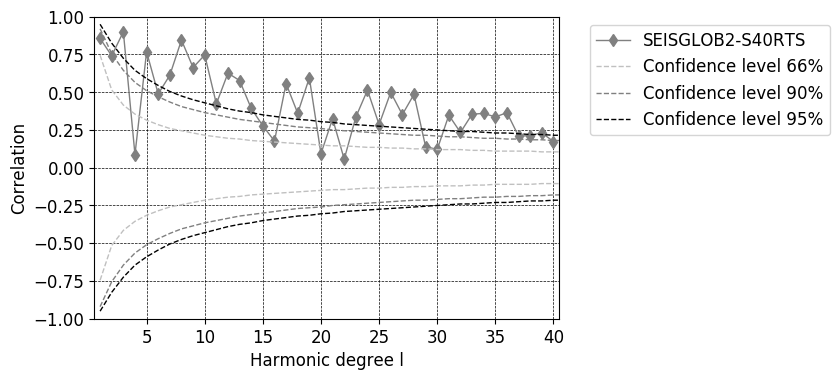

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
           Example of correlation using other models           
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


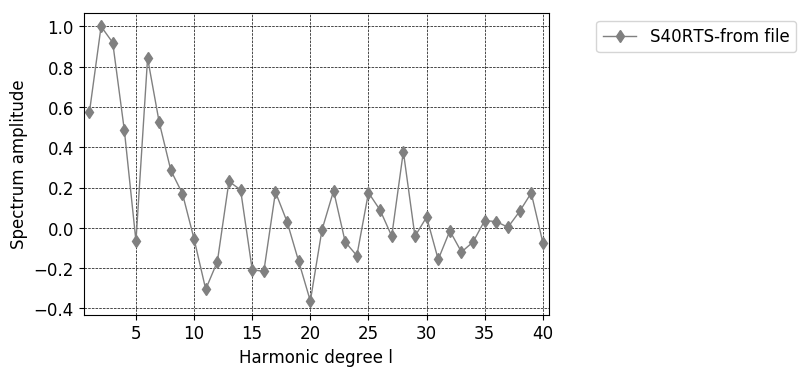

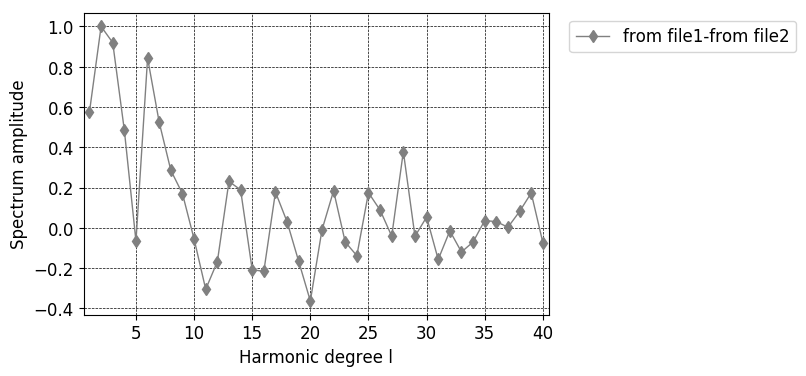

In [7]:
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print('Example of correlation computed betwenn the default tomographic models')
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

# Setting parameters
# Models to be used for computing the correlation
model1 = 'SEISGLOB2' 
model2 = 'S40RTS'
# Depth at which the correlation is computed
depth = 520
# Parameters used for computing the correlation
para1 = 'VS' 
para2 = 'VS' 
# Maximum spherical harmonic degree up to which the correlation is computed
NSmax = 40

# Running correlation
corr = SeisTomoPy.correlation(model1,model2,depth,depth,para1,para2,NSmax)

plt.plot(corr[:,0],corr[:,1],linewidth=1.0,color="grey",marker="d",label=model1 + '-' + model2)
conf66 = np.loadtxt('conf66.dat')
conf90 = np.loadtxt('conf90.dat')
conf95 = np.loadtxt('conf95.dat')
plt.plot(conf66[:,0], conf66[:,1], linewidth=1.0,color="silver", ls='--',label='Confidence level 66%')
plt.plot(conf90[:,0], conf90[:,1], linewidth=1.0,color="gray", ls='--',label='Confidence level 90%')
plt.plot(conf95[:,0], conf95[:,1], linewidth=1.0,color="black", ls='--',label='Confidence level 95%')
plt.plot(conf66[:,0], -conf66[:,1], linewidth=1.0,color="silver", ls='--')
plt.plot(conf90[:,0], -conf90[:,1], linewidth=1.0,color="gray", ls='--')
plt.plot(conf95[:,0], -conf95[:,1], linewidth=1.0,color="black", ls='--')
plt.xlabel("Harmonic degree l")
plt.ylabel("Correlation")
plt.xlim([0.5, NSmax+0.5])
plt.ylim([-1, 1])
plt.legend(bbox_to_anchor=(1.6, 1))
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.show()

print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print('           Example of correlation using other models           ')
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
# Setting new parameters
# Models to be used for computing the correlation
model1 = 'S40RTS'
# Depth at which the correlation is computed
depth1 = 2800
# Parameters used for computing the correlation
para1 = 'VS' 
# Maximum spherical harmonic degree up to which the correlation is computed
NSmax = 40

# Running correlation_fromfile
filename = 'SeisTomoPy_notebook/files/input_file_spectrum.xyz'
corr_fromfile = SeisTomoPy.correlation_fromfile(model1,depth1,para1,filename,NSmax)

# Plotting the results 
plt.plot(corr_fromfile[:,0], corr_fromfile[:,1]/np.amax(corr_fromfile[:,1]),linewidth=1.0,color="grey",marker="d",label=model1 + '-from file')
plt.legend(bbox_to_anchor=(1.55, 1))
plt.xlabel("Harmonic degree l")
plt.ylabel("Spectrum amplitude")
plt.xlim([0.5, NSmax+0.5])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.show()

# Running correlation_fromfile2
filename1 = 'SeisTomoPy_notebook/files/input_file_spectrum.xyz'
filename2 = 'SeisTomoPy_notebook/files/input_file_spectrum2.xyz'
corr_fromfile2 = SeisTomoPy.correlation_fromfile2(filename1,filename2,NSmax)

# Plotting the results 
plt.plot(corr_fromfile2[:,0], corr_fromfile2[:,1]/np.amax(corr_fromfile2[:,1]),linewidth=1.0,color="grey",marker="d",label='from file1-from file2')
plt.legend(bbox_to_anchor=(1.55, 1))
plt.xlabel("Harmonic degree l")
plt.ylabel("Spectrum amplitude")
plt.xlim([0.5, NSmax+0.5])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.show()

It is also possible to run the correlation calculations routinely at various depths. Again, be careful the example below can take some time to run. You can reduce this time changing 

$ depths = np.arange(100,2900,100)

to 

$ depths = np.arange(100,1100,100)

for instance.

('depth ', 100)
('depth ', 200)
('depth ', 300)
('depth ', 400)
('depth ', 500)
('depth ', 600)
('depth ', 700)
('depth ', 800)
('depth ', 900)
('depth ', 1000)
('depth ', 1100)
('depth ', 1200)
('depth ', 1300)
('depth ', 1400)
('depth ', 1500)
('depth ', 1600)
('depth ', 1700)
('depth ', 1800)
('depth ', 1900)
('depth ', 2000)
('depth ', 2100)
('depth ', 2200)
('depth ', 2300)
('depth ', 2400)
('depth ', 2500)
('depth ', 2600)
('depth ', 2700)
('depth ', 2800)


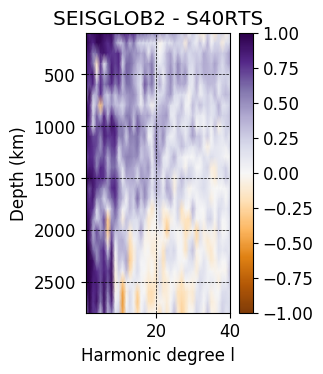

In [7]:
# Setting parameters
# Models to be used for computing the correlation
model1 = 'SEISGLOB2' 
model2 = 'S40RTS'
# Depth range at which the correlation is computed
depths = np.arange(100,2900,100)
# Parameters used for computing the correlation
para1 = 'VS' 
para2 = 'VS' 
# Maximum spherical harmonic degree up to which the correlation is computed
NSmax = 40

deg = np.arange(1,41,1)
corr1 = np.zeros([len(deg),len(depths)])

# Running correlation routinely at various depths
for i in range(len(depths)):
    corr11 = SeisTomoPy.correlation(model1,model2,depths[i],depths[i],para1,para2,NSmax)
    corr1[:,i] = corr11[:,1] 
    print('depth ',depths[i])

# Plotting the results
X, Y = np.meshgrid(deg, depths)
plt.subplots_adjust(bottom=0.2, right=0.5, left=0.2, top=0.9)
plt.pcolormesh(X, Y, ((np.transpose(corr1))), shading='gouraud', cmap='PuOr', vmin=-1, vmax=1)
plt.gca().invert_yaxis()
plt.ylabel('Depth (km)')
plt.xlabel('Harmonic degree l')
plt.title('SEISGLOB2 - S40RTS')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.colorbar()
plt.show()

## 5. Paths

The user may want to check which seismic structures of the mantle are sampled by seismics waves. To do so he can use SeisTomoPy.path_plot and SeisTomoPy.path_plot_fromfile to display seismic wave paths on top of cross sections made in the desired tomographic model coming from either one of the default ones included in SeisTomoPy or that the user provides. 

Below is an example with tomographic model SEISGLOB2, parameter $V_s$ and seismic phases S, ScS, PKP, PKiKP and Sdiff. If it happens that the seismic phase does not exist for the distance range between the eartquake and the station, then it will simply be ignored.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Two examples of path plots using the default tomographic models
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/durand/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: ax

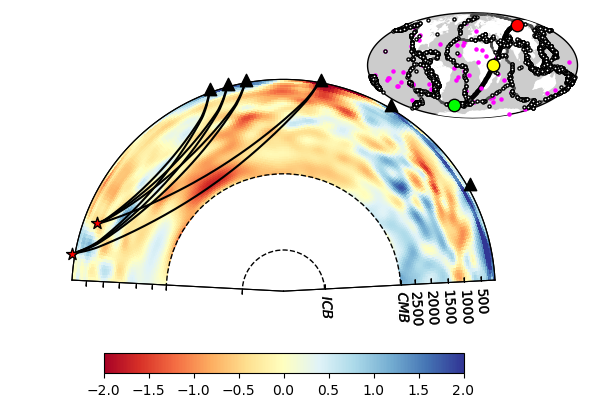

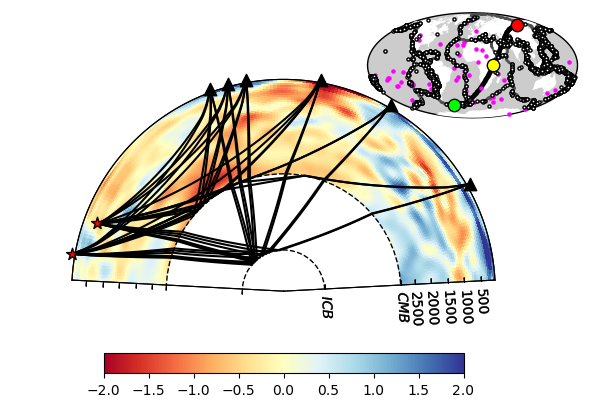

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
          An example of path plot using a model file         
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


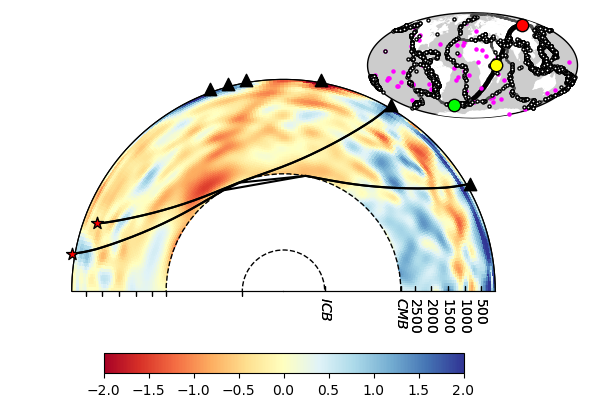

In [3]:
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print('Two examples of path plots using the default tomographic models')
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
# Setting parameters
# Model to be plotted
model = 'SEISGLOB2'  
# Parameter to be plotted
para = 'VS'    
# Latitutde of the starting point of the cross section
elat = -60    
# Longitude of the starting point of the cross section
elon = -49   
# Latitutde of the ending point of the cross section
slat = 60 
# Longitude of the ending point of the cross section
slon = 119  
# Maximal velocity perturbations for the colorbar
Vmax = 2             
# Liste of seismic phases
phlist = 'S'
# Position of stations and event
EVT = np.loadtxt('SeisTomoPy_notebook/files/event.xy')
STA = np.loadtxt('SeisTomoPy_notebook/files/station.xy')

# Running path_plot
SeisTomoPy.path_plot(model,para,Vmax,elat,elon,slat,slon,EVT,STA,phlist)

# Liste of seismic phases
phlist = 'S ScS PKP PKiKP Sdiff'

# Running path_plot
SeisTomoPy.path_plot(model,para,Vmax,elat,elon,slat,slon,EVT,STA,phlist)

print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
print('          An example of path plot using a model file         ')
print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

# Setting new parameters
# Latitutde of the starting point of the cross section
elat = -60    
# Longitude of the starting point of the cross section
elon = -49   
# Latitutde of the ending point of the cross section
slat = 60 
# Longitude of the ending point of the cross section
slon = 130  
# Parameter to be plotted
para = 'VS' 
# Angular size of the cross section
width = 180
# Sampling rate in theta direction
width_step = 1
# Theta vector
th = np.arange(90-(width/2), 90+(width/2)+width_step, width_step)
# Starting and ending radius of the cross section
r_min = 3481
r_max = 6281
# Sampling rate in radius direction
r_step = 50
# Radius vector
r = np.arange(r_min, r_max+r_step, r_step)

# Liste of seismic phases
phlist = 'Pdiff'

# Running path_plot_from_file
filename = 'SeisTomoPy_notebook/files/input_file_path.xyz'
SeisTomoPy.path_plot_fromfile(filename,th,r,para,elat,elon,slat,slon,Vmax,EVT,STA,phlist)

## 6. Travel times

Finally, the user can compute the travel time delays with respect to a reference model through a given tomographic model, $\delta t^{2D}_{TomoPy}$,  for any given seismic phases  and for any combinations of source and receiver provided by the user using SeisTomoPy.get_travel_time. 

We first plot the paths to see which part of the mantle the seismic waves are sampling.

Then, we provide an example of delays computed in model SEISGLOB2 for S and ScS seismic phases in the same region.

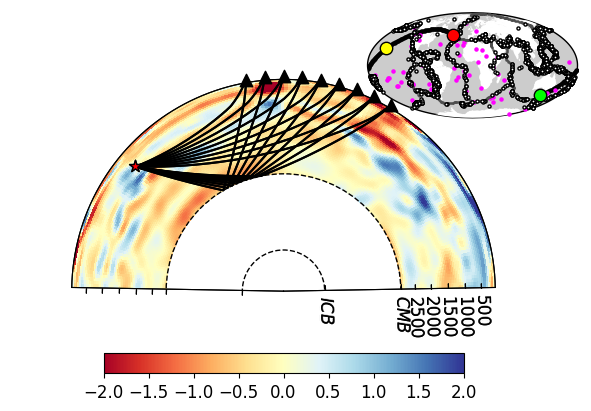

In [13]:
# Setting parameters
# Model to be plotted
model = 'SEISGLOB2'  
# Parameter to be plotted
para = 'VS'    
# Latitutde of the starting point of the cross section
elat =   -43 
# Longitude of the starting point of the cross section
elon = 140 
# Latitutde of the ending point of the cross section
slat = 44   
# Longitude of the ending point of the cross section
slon =  -42 
# Maximal velocity perturbations for the colorbar
Vmax = 2        
# Depth of the cross section
depth = 2890 
# Liste of seismic phases
phlist = 'S ScS'
# Position of stations and event
EVT = np.loadtxt('SeisTomoPy_notebook/files/event_time.xy')
STA = np.loadtxt('SeisTomoPy_notebook/files/station_time.xy')

# Running path
SeisTomoPy.path_plot(model,para,Vmax,elat,elon,slat,slon,EVT,STA,phlist)

0 S 1.80869197367 724.657340168 0.162310967555

1 S 2.57020639978 738.239623881 0.164944693174

2 S 2.58649315649 764.02806732 0.163141437663

3 S 1.15534945094 775.425672264 0.164111609055

4 S 1.28465831644 788.177963118 0.158493029883

5 S 1.73604927288 801.264323533 0.178782238942

6 S 0.545797945778 811.335660467 0.166015183453

7 S 0.972980232647 823.009834144 0.162840081756

8 S 1.11536276235 841.33887735 0.166041982999

9 S 0.522574744188 854.618584427 0.155867525312

10 S 0.925188270175 867.763936242 0.149870423914

11 S 1.17605679349 878.618677869 0.152813162568

12 S 1.82741325859 899.280363572 0.155904930939

13 S 1.33725254712 907.639131445 0.158962267063

14 S 1.58008191091 919.373915068 0.156780676418

15 S 2.09505139807 931.324539181 0.162714799627

16 S 2.09614039379 950.142656126 0.163686840452

17 S 3.390451127 958.457696135 0.162554658347

18 S 4.18390462444 973.103083986 0.15729862564

19 S 3.39959793914 984.91862119 0.162026799403

20 S 3.38220708902 999.443235114

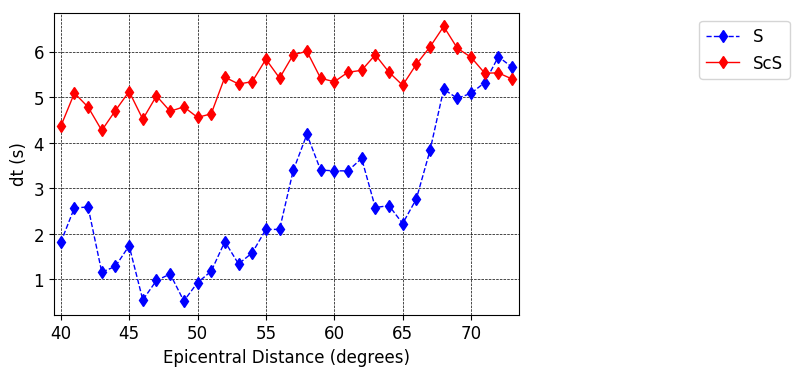

In [15]:
# Setting parameters
# Model to be plotted
model = 'SEISGLOB2'    
# Latitutde of the event
elat = -21    
# Longitude of the event
elon = -179 
# Depth of the event
edepth = 610
# Position of stations
STA = np.loadtxt('SeisTomoPy_notebook/files/lat_lon_ttstation.txt')

tt2D = np.zeros(len(STA))
dtt2D = np.zeros(len(STA))
ttREF = np.zeros(len(STA))
dist = np.arange(40,74,1)
degmin = 40
degmax = 73

# Running TimePy routinely
for k in range(len(STA)):
    # Liste of seismic phases
    phlist = ['S']
    tt2D[k],  dtt2D[k], ttREF[k], phase_name = SeisTomoPy.get_travel_time(model,elat,elon,edepth,STA[k,0],STA[k,1],phlist)
    file_str = str(k) + ' ' +  'S ' + str(tt2D[k]) + ' ' + str(tt2D[k]+ttREF[k]) + ' ' + str(dtt2D[k]) + '\n'
    print(file_str)

plt.plot(dist,tt2D,marker="d",linewidth=1.0,color="blue", ls='--',label = 'S')

for k in range(len(STA)):
    # Liste of seismic phases
    phlist = ['ScS']
    tt2D[k],  dtt2D[k], ttREF[k], phase_name = SeisTomoPy.get_travel_time(model,elat,elon,edepth,STA[k,0],STA[k,1],phlist)
    file_str = str(k) + ' ' + 'ScS ' + str(tt2D[k]) + ' ' + str(tt2D[k]+ttREF[k]) + ' ' + str(dtt2D[k]) + '\n'
    print(file_str)
    
# Plotting the results
plt.plot(dist,tt2D,marker="d",linewidth=1.0,color="red", ls='-',label = 'ScS')
plt.xlabel("Epicentral Distance (degrees)")
plt.ylabel("dt (s)")
plt.xlim([degmin-0.5, degmax+0.5])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.rcParams.update({'font.size': 12})
plt.legend(bbox_to_anchor=(1.6, 1))
plt.show()
